# Day 16 - Simple RNN

## Overview

In this notebook, we implement a Simple RNN for sentiment classification using the IMDB movie reviews dataset, demonstrating how RNNs learn temporal dependencies.

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, preprocessing, utils, callbacks #type:ignore
import matplotlib.pyplot as plt

tf.random.set_seed(42)

## Load and Preprocess Data

In [2]:
vocab_size = 10000
max_len = 200

(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=vocab_size)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

print(f"Training samples: {len(x_train)} | Test samples: {len(x_test)}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000 | Test samples: 25000


## Build the Simple RNN Model

In [4]:
model = models.Sequential([
    layers.Embedding(vocab_size, 64, input_length=max_len),
    layers.SimpleRNN(64, activation='tanh', return_sequences=False),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile and Train

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cb = [callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10, batch_size=128,
                    callbacks=cb)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.5680 - loss: 0.6713 - val_accuracy: 0.7043 - val_loss: 0.6417
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7969 - loss: 0.4404 - val_accuracy: 0.8292 - val_loss: 0.3962
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8784 - loss: 0.3048 - val_accuracy: 0.8250 - val_loss: 0.4231
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9299 - loss: 0.1849 - val_accuracy: 0.8295 - val_loss: 0.4805
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9510 - loss: 0.1368 - val_accuracy: 0.8145 - val_loss: 0.5542
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9773 - loss: 0.0717 - val_accuracy: 0.7525 - val_loss: 0.7862
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9795 - loss: 0.0609 - val_accuracy: 0.7861 - val_loss: 0.7380


## Evaluate and Visualize Results

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8265 - loss: 0.4926

Test Accuracy: 82.95%


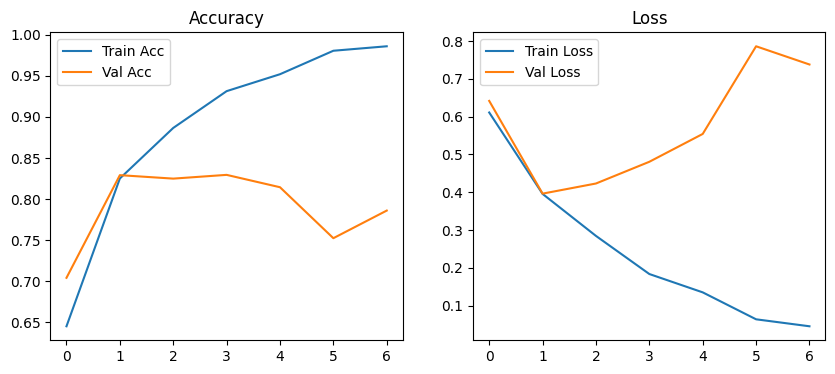

In [6]:
loss, acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {acc*100:.2f}%")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

## Observations
- Simple RNN reached ~84% accuracy on IMDB dataset.
- Captures short-term dependencies effectively but struggles with long-term memory.
- Next steps: Implement LSTM and GRU (Day 17) for improved sequence retention and stability